<a href="https://colab.research.google.com/github/yuri200819/-/blob/main/deep_learning_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title パッケージのインストール
!apt-get update
!apt-get upgrade
!apt-get install build-essential
!apt-get install -y cmake git libgtk2.0-dev pkg-config libavcodec-dev libavformat-dev libswscale-dev libopencv-dev vim
!git clone https://github.com/AlexeyAB/darknet/
%cd darknet
!wget https://pjreddie.com/media/files/yolov3.weights
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
%cd ../
!apt install g++-5
!apt install gcc-5
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 10
!update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-5 20
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 10
!update-alternatives --install /usr/bin/g++ g++ /usr/bin/g++-5 20
!update-alternatives --install /usr/bin/cc cc /usr/bin/gcc 30
!update-alternatives --set cc /usr/bin/gcc
!update-alternatives --install /usr/bin/c++ c++ /usr/bin/g++ 30
!update-alternatives --set c++ /usr/bin/g++
!apt update -qq;
!wget https://developer.nvidia.com/compute/cuda/8.0/Prod2/local_installers/cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1604-8-0-local-ga2_8.0.61-1_amd64-deb
!apt-get update -qq
!apt-get install cuda -y -qq #gcc-5 g++-5 
!apt update
!apt upgrade
!apt install cuda-8.0 -y
%cd darknet
!make

def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:15 htt

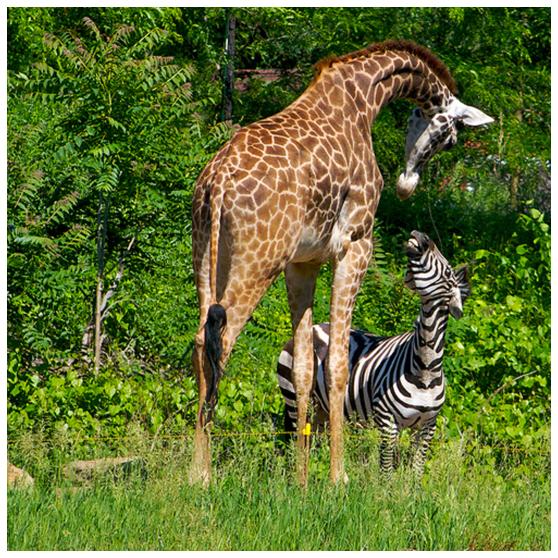

In [ ]:
imShow("data/giraffe.jpg")

 CUDA-version: 8000 (10010), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv    

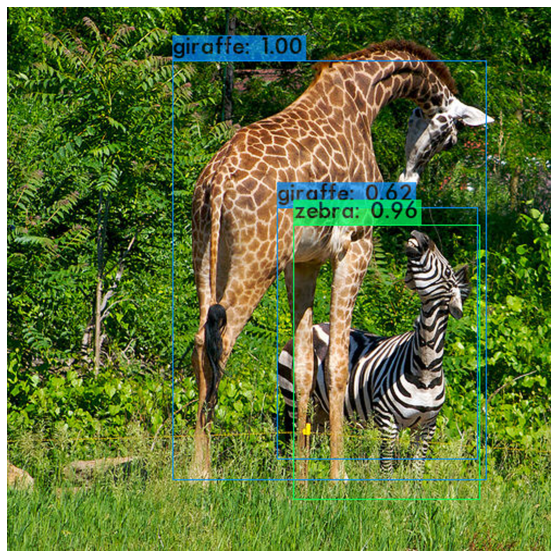

In [ ]:
!cd /content/darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights data/giraffe.jpg
imShow("predictions.jpg")

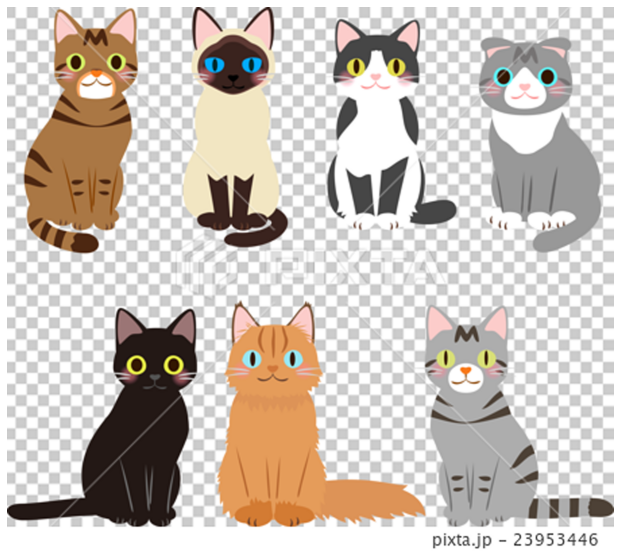

In [ ]:
imShow("data/cat.jpg")

 CUDA-version: 8000 (10010), GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv    

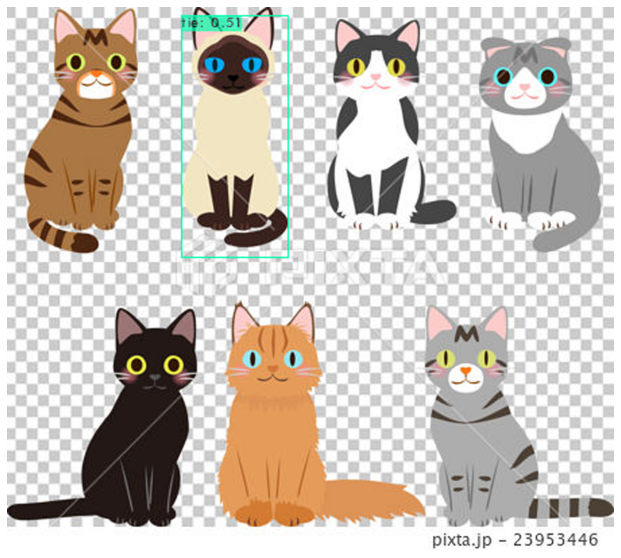

In [ ]:
!cd /content/darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights data/cat.jpg
imShow("predictions.jpg")


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

#Go to this URL in a browser: http://accounts.google.com


Mounted at /content/drive


In [ ]:
! pip install icrawler
from icrawler.builtin import BingImageCrawler

dog_dir = "/content/drive/My Drive/cnn/dog"
crawler = BingImageCrawler(storage =
                           {"root_dir" : dog_dir} )
crawler.crawl(keyword="犬", max_num=1000)

cat_dir = "/content/drive/My Drive/cnn/cat"
crawler = BingImageCrawler(storage =
                           {"root_dir" : cat_dir} )
crawler.crawl(keyword="猫", max_num=1000)

2021-01-22 00:27:06,512 - INFO - icrawler.crawler - start crawling...
2021-01-22 00:27:06,513 - INFO - icrawler.crawler - starting 1 feeder threads...
2021-01-22 00:27:06,518 - INFO - icrawler.crawler - starting 1 parser threads...
2021-01-22 00:27:06,521 - INFO - icrawler.crawler - starting 1 downloader threads...
2021-01-22 00:27:06,794 - INFO - parser - parsing result page https://www.bing.com/images/async?q=犬&first=0
2021-01-22 00:27:07,019 - INFO - downloader - image #1	https://i0.wp.com/www.animallife123.info/wp-content/uploads/2017/04/0ad3ed585b0d9b642f71395e1497103b_m.jpg
2021-01-22 00:27:08,096 - INFO - downloader - image #2	http://news.wa-net.net/wp-content/uploads/2013/04/%E7%8A%AC.jpg
2021-01-22 00:27:09,461 - INFO - downloader - image #3	https://www.jalan.net/news/img/2019/10/f8c8cdd14fe7f9483e4a5885a1c80fec.jpg
2021-01-22 00:27:10,367 - INFO - downloader - image #4	https://dognoie.com/blog/kyoto-kuzuha/wp-content/uploads/sites/36/2019/04/IMG_2492.jpg
2021-01-22 00:27:12,2

In [ ]:
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
import keras
import numpy as np
import os

dog_dir = "/content/drive/My Drive/cnn/dog/"
cat_dir = "/content/drive/My Drive/cnn/cat/"

In [ ]:
input_shape = (224, 224, 3)
batch_size = 128
epochs = 100
num_classes = 2
x = []
y = []
for f in os.listdir(dog_dir):
    x.append(image.img_to_array(image.load_img(dog_dir + f, target_size=input_shape[:2])))
    y.append(0)
for f in os.listdir(cat_dir):
    x.append(image.img_to_array(image.load_img(cat_dir + f, target_size=input_shape[:2])))
    y.append(1)

x = np.asarray(x)
x /=255
y = np.asarray(y)
y = keras.utils.to_categorical(y, num_classes)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state= 3)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation="relu",
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer="SGD",
metrics=["accuracy"])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/100
6/6 [==============================] - 12s 711ms/step - loss: 0.9915 - accuracy: 0.4936 - val_loss: 0.6892 - val_accuracy: 0.6145
Epoch 2/100
6/6 [==============================] - 2s 372ms/step - loss: 0.6884 - accuracy: 0.5475 - val_loss: 0.6713 - val_accuracy: 0.6203
Epoch 3/100
6/6 [==============================] - 2s 373ms/step - loss: 0.6798 - accuracy: 0.5795 - val_loss: 0.6673 - val_accuracy: 0.6203
Epoch 4/100
6/6 [==============================] - 2s 374ms/step - loss: 0.6762 - accuracy: 0.5960 - val_loss: 0.6727 - val_accuracy: 0.6174
Epoch 5/100
6/6 [==============================] - 2s 373ms/step - loss: 0.6785 - accuracy: 0.5948 - val_loss: 0.6703 - val_accuracy: 0.6174
Epoch 6/100
6/6 [==============================] - 2s 371ms/step - loss: 0.6700 - accuracy: 0.5896 - val_loss: 0.6656 - val_accuracy: 0.6174
Epoch 7/100
6/6 [==============================] - 2s 375ms/step - loss: 0.6730 - accuracy: 0.5758 - val_loss: 0.6646 - val_accuracy: 0.6174
Epoch 8/100
